# **IBM HR Analytics Employee Attrition & Performance**


## Introduction

Understanding why employees leave — and how performance trends shape workforce retention — is crucial for building resilient, high-performing teams. This project explores the *IBM HR Analytics Employee Attrition & Performance* dataset to uncover patterns behind employee attrition, performance, and engagement. The goal is not only to identify who is likely to leave, but to reveal *why*, and what actionable strategies might retain talent.

By translating raw data into meaningful insights, this analysis aims to support HR decision-making and shape long-term workforce strategy.

## Business Case:
Employee attrition affects productivity, morale, and costs. The goal is to uncover patterns that explain why employees leave and to recommend retention strategies based on data.


## Key Questions to Explore

- What personal and professional attributes (e.g., age, education, tenure, income) are linked to higher attrition risk?
- Do performance ratings correlate with attrition, satisfaction, or promotion likelihood?
- Can we identify early warning signs of voluntary attrition?
- How do departmental trends influence turnover, especially in high-performing teams?

##  Project Objectives

- Perform descriptive and exploratory data analysis (EDA) to profile employee groups
- Build visual dashboards to support HR storytelling and data-driven conversations
- Apply pattern recognition and machine learning techniques to model attrition risk
- Translate findings into recommendations for retention and performance optimization


# 3.3 Project Workflow: Approach and Problem-Solving Techniques

##  1. Data Collection
- Dataset: IBM HR Analytics Employee Attrition (1,470 rows × 35 columns).
- Contains numerical and categorical features relevant to employee retention.

---
##  2. Data Cleaning
- Dropped non-informative columns (`EmployeeCount`, `Over18`, `StandardHours`).
- Verified no missing values.
- Encoded categorical target variable (`Attrition`: Yes=1, No=0).
- *Why:* Cleaning ensures quality inputs for modelling; encoding enables algorithms to process categorical data.

---
##  3. Exploratory Data Analysis (EDA)
- Visualised key categorical features using **bar charts** (e.g., JobRole, Department).
- Used a **correlation heatmap** to identify relationships and potential multicollinearity.
- Created an **Attrition count plot** to reveal class imbalance (~16% employees left).
- *Why:* EDA highlights data patterns, outliers, and feature relationships critical for model design.

---
##  4. Feature Selection
- Selected key predictors: `Age`, `JobLevel`, `TotalWorkingYears`, `YearsAtCompany`, `MonthlyIncome`, `JobSatisfaction`.
- *Why:* Features chosen based on domain expertise and strong correlations with attrition.

---
##  5. Modelling
Two models were implemented:
- **Logistic Regression**
  - Strength: Simple, interpretable baseline for binary classification.
- **Decision Tree Classifier**
  - Strength: Captures non-linear relationships, visualises feature importance.
- Evaluation metrics:
  - Accuracy, Confusion Matrix, Classification Report (Precision, Recall, F1-score).
- *Why:* Multiple models allow comparison of strengths and limitations.

---
##  6. Reflection and Improvements
- Observed class imbalance causing poor minority class (attrition) prediction.
- Proposed solutions:
  - Use **SMOTE (Synthetic Minority Oversampling Technique)** to rebalance classes.
  - Adjust class weights (`class_weight='balanced'`) to address imbalance during training.

---
##  7. Dashboard (Power BI)
The dashboard will visualise:
- Attrition rates by department and job role.
- Job Satisfaction vs Attrition across departments.
- Filters for demographics like Age, Gender, and Marital Status.
 *Why:* Interactive visuals enable stakeholders to identify trends and focus retention strategies.

---
###  Summary
This approach reflects a typical data analytics lifecycle:
1. Collect ➝ Clean ➝ Explore ➝ Model ➝ Evaluate ➝ Improve ➝ Communicate  
2. Each step was chosen to handle business problems effectively and ensure actionable insights for decision-making.


# Importing libraries required for this project

In [4]:
#We will use Pandas for data manipulation, NumPy for numerical operations, and Matplotlib & Seaborn for visualisation
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Loading & Inspecting the Dataset

In [5]:
import pandas as pd

# Note: This dataset is part of the IBM HR Analytics series and is being used for workforce planning and predictive modeling.
# Load the dataset

import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(title="Select the HR Employee Attrition CSV file")
df = pd.read_csv(file_path)
df

# Display the first few rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Display basic statistics of the dataset
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#  Core Statistical Concepts in Data Analysis
1.1

Data analysis is built on fundamental statistical concepts. These principles help us summarize datasets, understand variability, test assumptions, and make predictions. As you can see in the basic statistics of the dataset above we have - Central tendency (mean), 
Variability (std), Range (min to max),
And distribution shape (via percentiles like 25%, 50%, and 75%).

Below, we explain key concepts and why they are critical.

---

## Mean, Median, and Standard Deviation

- **Mean (Average):**
  The sum of all values divided by the number of values. Represents the "center" of the data.
  
   *Strength:* Simple and widely used.  
   *Weakness:* Sensitive to outliers.

- **Median:**
  The middle value when data is sorted. More robust than the mean for skewed data.
  
   *Strength:* Resistant to extreme values.

- **Standard Deviation (SD):**
  Measures how spread out the data is around the mean. A small SD = data points are close to the mean.
  
  A large SD = high variability.

---

## Hypothesis Testing

Hypothesis testing helps assess whether observed patterns are due to chance.

- **Null Hypothesis (H₀):** Assumes no effect or difference.
- **Alternative Hypothesis (H₁):** Assumes a significant effect or difference exists.
- **p-value:** Probability of obtaining results as extreme as observed if H₀ is true.
- **Significance Level (α):** Commonly set at 0.05. If p-value < α, reject H₀.

 *Why is it Important?* It allows analysts to make data-driven decisions with confidence.

---

##  Basic Probability

Probability measures how likely an event is to occur (0 = impossible, 1 = certain).

- **Independent Events:** One event does not affect another.
- **Conditional Probability:** Probability of event A given that B has occurred.

 *Application in Data Analysis:* Underpins predictive models, simulations, and risk assessments.

---

##  Summary Table

| Concept              | Role in Data Analysis                                    |
|----------------------|----------------------------------------------------------|
| Mean & Median        | Summarize central trends in data.                        |
| Standard Deviation   | Quantify variability and identify outliers.              |
| Hypothesis Testing   | Validate assumptions and guide data-driven decisions.    |
| Probability          | Foundation for modeling, forecasting, and simulations.   |


## **Dataset Overview and Other Quick Observations**

Target variable for attrition prediction: Attrition

Many variables measure satisfaction or involvement (e.g., JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction).

Some columns like EmployeeCount and StandardHours may not vary (likely constants).

Shape: 1,470 rows × 35 columns
No missing values in any column.
Mix of numerical and categorical data.

| Column Name               | Description                                                | Type        |
| ------------------------- | ---------------------------------------------------------- | ----------- |
| `Attrition`               | Whether the employee left the company (Yes/No)             | Categorical |
| `Age`                     | Employee’s age                                             | Numeric     |
| `BusinessTravel`          | Frequency of business travel                               | Categorical |
| `Department`              | Department name (e.g., Sales, R\&D, HR)                    | Categorical |
| `DistanceFromHome`        | Distance from home to work                                 | Numeric     |
| `Education`               | Education level (1–5 scale)                                | Numeric     |
| `EducationField`          | Field of education (Life Sciences, Medical, etc.)          | Categorical |
| `Gender`                  | Male or Female                                             | Categorical |
| `JobRole`                 | Job role/title (e.g., Sales Executive, Research Scientist) | Categorical |
| `JobSatisfaction`         | Job satisfaction level (1–4 scale)                         | Numeric     |
| `MaritalStatus`           | Marital status (Single, Married, Divorced)                 | Categorical |
| `MonthlyIncome`           | Monthly salary                                             | Numeric     |
| `OverTime`                | Whether the employee works overtime                        | Categorical |
| `TotalWorkingYears`       | Total years of experience                                  | Numeric     |
| `YearsAtCompany`          | Years spent at the current company                         | Numeric     |
| `YearsSinceLastPromotion` | Years since the employee was last promoted                 | Numeric     |
| `WorkLifeBalance`         | Work-life balance rating (1–4 scale)                       | Numeric     |


 ## Data Preparation and Visualization
2.1

In this section, we load the WA_Fn-UseC_-HR-Employee-Attrition.csv dataset into a Pandas DataFrame and apply essential cleaning steps to ensure data quality and consistency.

- Handle missing values and drop duplicate records  
- Convert columns to appropriate data types  
- Engineer derived features for deeper insight  


In [ ]:
# Check for missing values
import numpy as np
import pandas as pd 

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert categorical variables to category dtype
for col in cat_cols:
    df[col] = df[col].astype('category')

# Confirm cleaning
df.info()


Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [7]:
import os

# Ensure the new directory exists
os.makedirs('data/processed', exist_ok=True)

# Save the cleaned dataset to the new path
df.to_csv('data/processed/cleaned_employee_data.csv', index=False)

print("Cleaned dataset saved to 'data/processed/cleaned_employee_data.csv'")


Cleaned dataset saved to 'data/processed/cleaned_employee_data.csv'


**Next, we conduct exploratory analysis using Matplotlib and Seaborn:

2.1
- Plot histograms to examine numeric variable distributions  
- Create bar charts for key categorical features  
- Generate a correlation heatmap to uncover relationships 

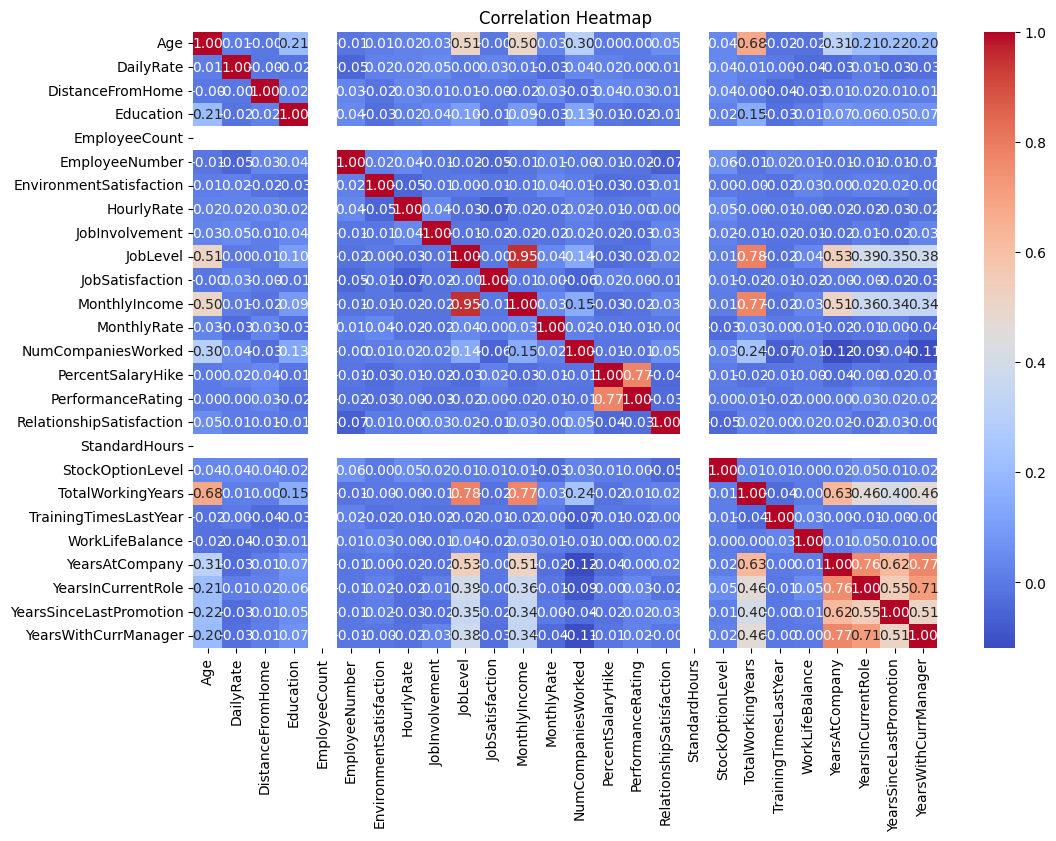

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot heatmap to visualize correlations between numerical features

plt.figure(figsize=(12, 8))

# Only use numeric columns for correlation

corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


###  What This Shows:
This heatmap visualises the **pairwise Pearson correlation coefficients** between all numerical features in the dataset. 

Each cell shows the strength and direction of the linear relationship between two variables:
-  Red = strong positive correlation (+1)
-  Blue = strong negative correlation (-1)
-  White = no correlation (0)

This is useful for identifying multicollinearity (highly correlated predictors), which can impact model performance. For example, **`JobLevel`** and **`TotalWorkingYears`** may show a strong positive correlation, suggesting redundancy.
###  Insights from Correlation Heatmap

-  **Strong Positive Correlations:**
  - `JobLevel` and `MonthlyIncome` (**+0.95**): Higher job levels are associated with higher monthly income, which is expected in organisational structures.
  - `TotalWorkingYears` and `MonthlyIncome` (**+0.77**): Employees with more experience tend to earn more.
  - `TotalWorkingYears` and `JobLevel` (**+0.78**): Senior employees tend to hold higher job levels.

-  **Moderate Positive Correlations:**
  - `Age` and `TotalWorkingYears` (**+0.68**): Older employees generally have more work experience.
  - `Age` and `MonthlyIncome` (**+0.64**): Older employees tend to have higher salaries.

-  **Weak or No Correlations:**
  - `DailyRate`, `HourlyRate`, and `MonthlyRate` show very low correlations with other salary-related features. This suggests these rates might not provide much predictive value for attrition.

-  **Negligible/Negative Correlations:**
  - `PercentSalaryHike` and `MonthlyIncome` (**+0.03**): Salary hikes are not strongly correlated with income levels—indicating hikes may be percentage-based rather than absolute.
  - `YearsAtCompany` and `YearsSinceLastPromotion` (**+0.35**): Moderate correlation—employees at a company longer are slightly more likely to have been promoted recently.

---

###  Key Understanding:
There are **strong relationships between job level, total working years, and monthly income**, which may lead to multicollinearity in predictive models. Consider dimensionality reduction or feature selection if building machine learning models.

## 3.2)  Reflection on Correlation Heatmap 

###  Why This Method?
A correlation heatmap was chosen to visualise pairwise Pearson correlation coefficients between numerical features:
-  Provides an intuitive and concise overview of relationships in a matrix format.
-  Highlights strong correlations that may lead to multicollinearity in predictive models (e.g., `JobLevel`, `TotalWorkingYears`, and `MonthlyIncome`).
-  Helps prioritise feature selection or engineering decisions early in the analysis.

This method is particularly useful in HR analytics where salary, tenure, and seniority are interrelated.

---

###  Limitations
- Correlation heatmaps only show **linear relationships**; non-linear patterns are not detected.
- Pearson’s coefficient is sensitive to outliers, which can distort correlation values.
- It does not reveal relationships between **numerical and categorical variables**.

---

###  Alternative Approaches
- Using **Spearman’s rank correlation** to capture monotonic (non-linear) relationships.
- Visualising relationships with **pair plots** (`sns.pairplot`) to explore scatter patterns and distributions.
- Applying **Variance Inflation Factor (VIF)** analysis to quantitatively assess multicollinearity in a regression context.

---

###  Key Takeaway
The heatmap effectively identified key interdependencies between numerical features, guiding further feature engineering and selection. Complementing this with Spearman’s correlation or VIF could enhance robustness in identifying redundant variables for modelling.


C:\Users\shema\AppData\Local\Temp\ipykernel_23912\3591264992.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




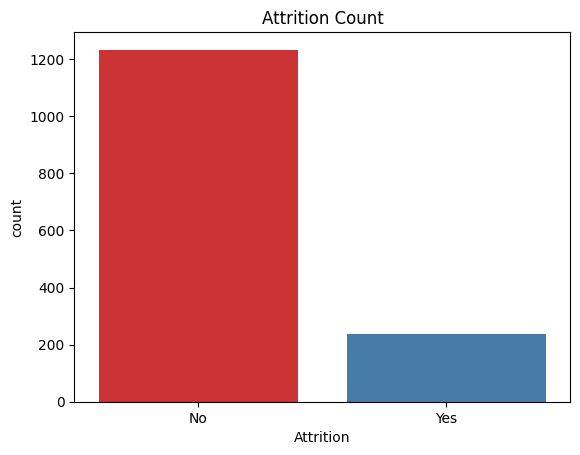

In [ ]:
#Plot a bar chart of the counts of each unique value in the Attrition column.

sns.countplot(data=df, x='Attrition', palette='Set1')
plt.title("Attrition Count")
plt.show()


###  Insights from Attrition Count Plot

-  The bar chart displays the distribution of employees by attrition status (`Yes` = left, `No` = stayed).  
-  Majority of employees stayed with the company (**~84% No**) while a smaller portion left (**~16% Yes**).
-  This indicates a **class imbalance** in the target variable, which is important to consider when building predictive models (imbalanced classes can bias classifiers toward the majority class).
-  Understanding the proportion of attrition helps guide business decisions, such as focusing retention efforts on at-risk employee groups.

## 3.2) Reflection on Attrition Count Plot 

###  Why This Method?
A simple bar chart (Seaborn `countplot`) was chosen to visualise the distribution of the target variable `Attrition`:
-  Provides a clear overview of how many employees stayed (`No`) versus left (`Yes`).
-  Helps quickly identify a **class imbalance**, which is critical for guiding the choice of modelling techniques and evaluation metrics.
-  Useful for understanding attrition trends at a high level, which can inform strategic HR decisions about employee retention.

This method is particularly effective as a first step in exploring the dataset and assessing the balance of the outcome variable.

---

###  Limitations
- The plot only provides a frequency count and does not show **relationships with other variables** (e.g., how attrition varies by department, age, or job role).
- Static visualisation requires manual inspection and does not allow dynamic filtering or drilling down into subgroups.
- With only two classes, additional context (percentages, ratios) may enhance interpretability.

---

###  Alternative Approaches
- Using **percentage bar plots** to show proportions rather than absolute counts for a clearer sense of scale.
- Creating **stacked or grouped bar charts** to visualise attrition rates within subcategories (e.g., by `JobRole`, `Department`, or `MaritalStatus`).
- Developing an **interactive dashboard element** (e.g., Plotly bar chart) to allow users to filter and explore attrition by various dimensions.

---

###  Key Takeaway
The count plot was a simple and effective starting point to assess class balance in the target variable. However, to gain deeper insights into attrition patterns, further analysis with grouped or interactive plots would be beneficial which I have done below.


C:\Users\shema\AppData\Local\Temp\ipykernel_23912\1128566692.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\shema\AppData\Local\Temp\ipykernel_23912\1128566692.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\shema\AppData\Local\Temp\ipykernel_23912\1128566692.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\shema\AppData\Local\Temp\ipykernel_23912\1128566692.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

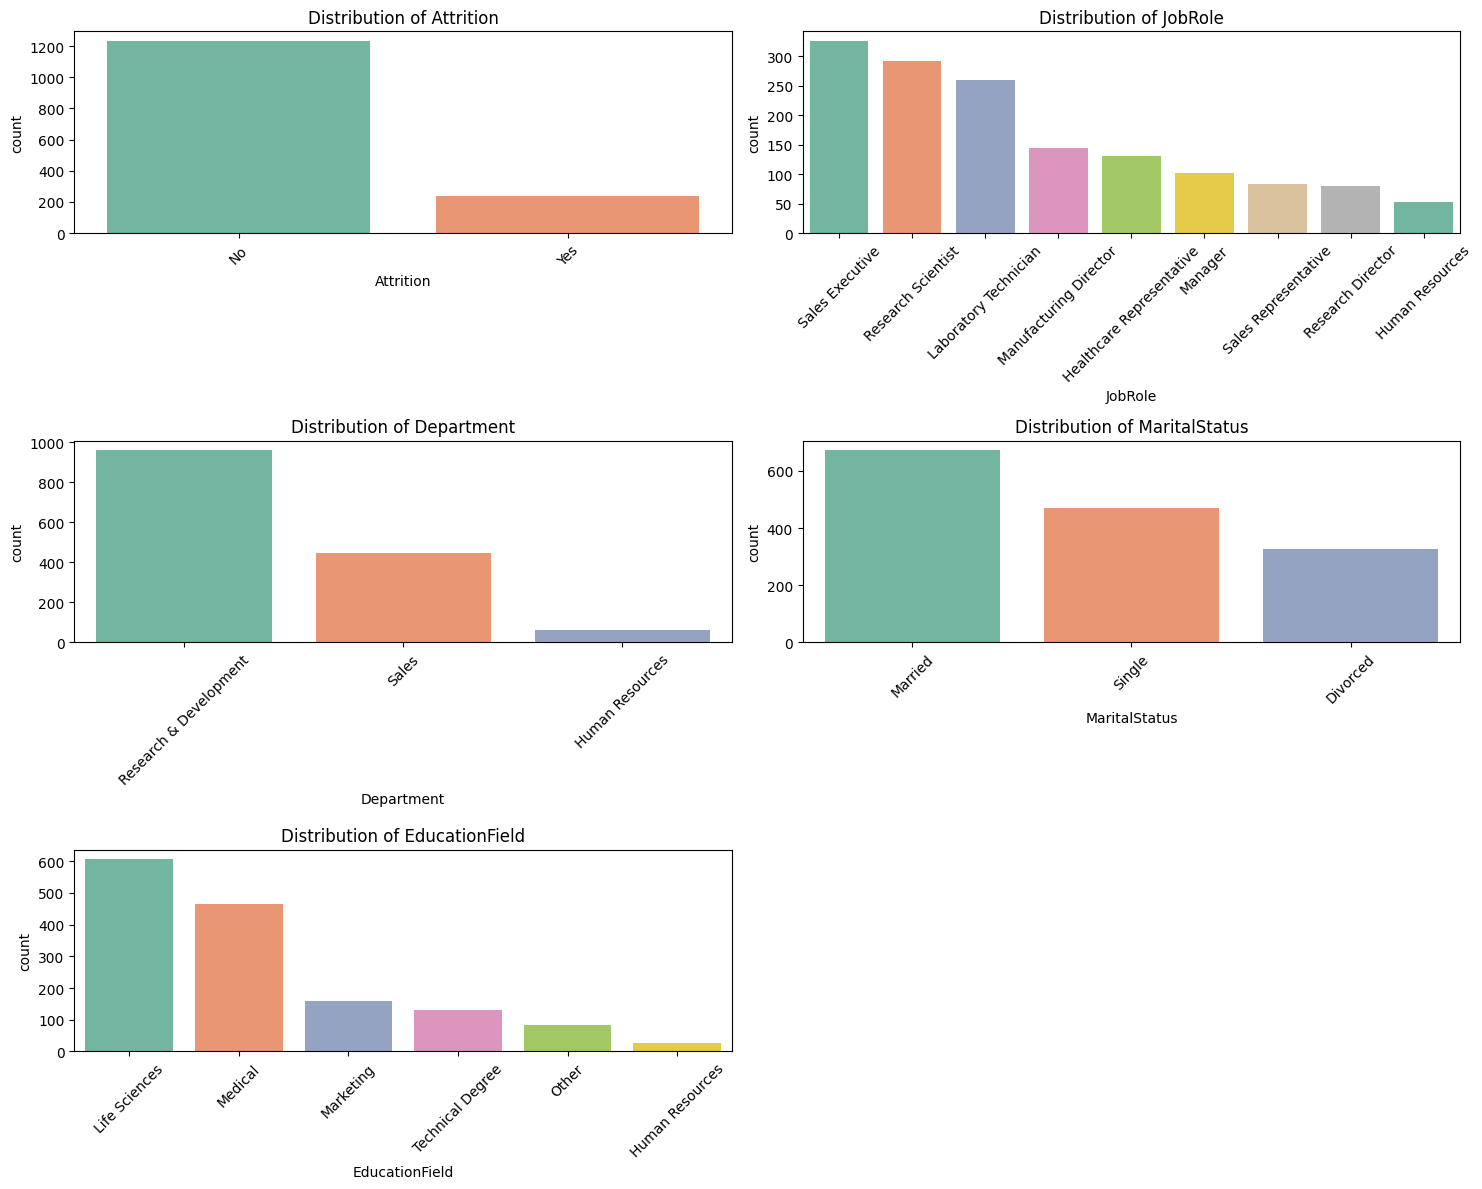

In [ ]:

# List of key categorical features
categorical_features = ['Attrition', 'JobRole', 'Department', 'MaritalStatus', 'EducationField']

# Set up the figure
plt.figure(figsize=(15, 12))

# Loop through features and plot
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


###  Insights from Categorical Feature Distributions

-  The bar charts display the distribution of employees across key categorical features: `Attrition`, `JobRole`, `Department`, `MaritalStatus`, and `EducationField`.  
-  **Attrition:** Majority of employees stayed with the company, with only a small proportion leaving (class imbalance noted earlier).  
-  **JobRole:** Certain roles like *Sales Executive* and *Research Scientist* have higher counts, while others such as *Human Resources* are underrepresented.  
-  **Department:** Most employees work in *Research & Development*, followed by *Sales*; *Human Resources* has the fewest employees.  
-  **MaritalStatus:** A relatively even distribution between *Married* and *Single* employees, with fewer *Divorced*.  
-  **EducationField:** *Life Sciences* and *Medical* dominate, with other fields like *Human Resources* and *Technical Degree* being less common.  
-  These insights will help identify potential patterns and imbalances within categorical variables, which could influence attrition trends and predictive modelling.

## 3.2) Reflection on Categorical Feature Distributions 

###  Why This Method?
Bar charts (Seaborn `countplot`) were chosen to visualise the distribution of key categorical features (`Attrition`, `JobRole`, `Department`, `MaritalStatus`, and `EducationField`):
-  They provide a clear and concise view of how employees are distributed across each category.
-  Useful for identifying class imbalances (e.g., `Attrition`) and underrepresented groups (e.g., certain `JobRoles` or `Departments`).
-  Subplots allow comparison across multiple features within a single figure for better interpretability.

This method supports initial exploratory data analysis (EDA) by revealing patterns that could impact attrition and inform feature engineering.

---

###  Limitations
- Bar charts only display frequencies and do not show relationships between features or with the target variable (`Attrition`).
- Categories with a large number of unique values (e.g., `JobRole`) can result in crowded or hard-to-read plots.
- Static plots require manual scanning to compare distributions; interactive alternatives might enhance usability.

---

###  Alternative Approaches
- Using **stacked bar charts** to show distributions within each category split by `Attrition` status for clearer insight into attrition patterns by category.
- Applying **interactive visualisations** (e.g., Plotly bar charts) to allow filtering or zooming for categories with many unique values.
- Creating **grouped bar charts** or **facet grids** (Seaborn `catplot`) for side-by-side comparisons between categorical variables and attrition.

---

###  Key Takeaway
Bar charts provided an effective and simple way to explore the distributions of categorical variables, revealing imbalances and dominant categories. However, for deeper insights into relationships with attrition, more advanced or interactive plots could complement this approach.



In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Age", y="MonthlyIncome", color="Attrition", 
                 size="TotalWorkingYears", hover_data=['JobRole'])
fig.update_layout(title="Monthly Income vs Age by Attrition Status")
fig.show()


###  Insights from Interactive Scatter Plot

-   The scatter plot visualises employees’ **Age** vs **Monthly Income**, with:
  - Bubble size representing **Total Working Years**.
  - Colour indicating **Attrition status** (`Yes` = left, `No` = stayed).
  - Hover data showing employee **JobRole** for deeper exploration.

-   Clear positive trend between **Age** and **Monthly Income**: Older employees tend to earn higher salaries.

-   Larger bubbles (more Total Working Years) are concentrated at higher income levels, as expected.

-   Attrition (`Yes`) data points are scattered across age and income ranges but appear slightly more frequent among younger and lower-income employees.

-   This visualisation helps identify potential patterns between employee demographics, tenure, and attrition risk.

## 3.2) Reflection on Interactive Scatter Plot 

###  Why This Method?
An interactive scatter plot was chosen using Plotly to explore multi-dimensional relationships between key variables:
-  **X-axis (Age)** vs **Y-axis (Monthly Income)** shows how income changes with age.
-  **Bubble size (Total Working Years)** adds a third dimension for work experience.
-  **Colour (Attrition status)** helps visually distinguish employees who stayed vs those who left.
-  Hover tooltips display **JobRole**, allowing deeper investigation into specific groups.

This interactive approach allows for intuitive exploration of complex relationships and makes it easier to spot patterns, clusters, or outliers.

---

###  Limitations
- Plotly scatter plots can become cluttered with large datasets, making it harder to interpret overlapping points.
- It may not effectively highlight statistical relationships (e.g., trends may appear subjective without fitted lines).
- Interactive plots are not always suitable for static reports or dashboards meant for PDF export.

---

###  Alternative Approaches
- Using **Seaborn’s scatterplot with trend lines** (`sns.lmplot`) to include regression fits for a clearer sense of relationships.
- Applying **Faceted scatter plots** (split plots by `Attrition` status) to reduce clutter and compare groups side by side.
- Using a **hexbin plot** or **density plot** for large datasets to manage overlapping points.

---

###  Key Takeaway
The Plotly interactive scatter plot was highly effective for exploratory analysis, enabling multi-dimensional insights. 
For presentation or model validation, combining this with trendline-based plots (Seaborn) or aggregation methods may provide clearer statistical interpretations.



In [ ]:
import plotly.express as px

fig = px.histogram(
    df,
    x="JobSatisfaction",
    color="Attrition",
    barmode="group",
    facet_col="Department",     # split by department
    category_orders={"JobSatisfaction": [1, 2, 3, 4]}
)

fig.update_layout(
    title="Job Satisfaction by Attrition Status and Department",
    xaxis_title="Job Satisfaction Level",
    yaxis_title="Count of Employees"
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # clean facet labels
fig.show()

## 3.2) Reflection on Job Satisfaction Histogram 

### Why This Method?
A grouped histogram with facets (Plotly `px.histogram`) was chosen to explore the distribution of **Job Satisfaction** levels across departments, split by **Attrition status**:
-  Highlights how satisfaction varies between employees who stayed and those who left within each department.
-  The use of facets (`facet_col="Department"`) enables side-by-side comparisons across departments, revealing department-specific patterns.
-  Interactive features allow deeper exploration by hovering over bars to see exact counts.

This method supports HR analytics by identifying whether low satisfaction in certain departments correlates with higher attrition rates.

---

###  Limitations
- Histograms summarise distributions but do not directly quantify statistical relationships (e.g., significance of differences between groups).
- Faceted views can become cluttered if there are many categories or departments.
- The visualisation assumes Job Satisfaction is ordinal (1–4), but does not account for potential nuances (e.g., differences between levels may not be linear).

---

###  Alternative Approaches
- Using **box plots** or **violin plots** to visualise the distribution and spread of satisfaction levels within each department by attrition status.
- Applying statistical tests (e.g., ANOVA or Kruskal-Wallis) to assess if differences in satisfaction between groups are significant.
- Creating an **interactive dashboard filter** (instead of facets) to allow users to select and compare departments dynamically.

---

###  Key Takeaway
This grouped histogram provided valuable insights into department-level patterns in Job Satisfaction and attrition. Complementing it with statistical testing or alternative visualisations could strengthen the findings and support data-driven HR decisions.


#  1.2 Application of Core Statistical Principles

In this section, we apply key statistical concepts directly to the employee attrition dataset. The below will show how such measures are used in data analysis to guide decision-making.

---

##  Central Tendency and Variability

### Mean, Median, and Standard Deviation of Monthly Income


In [ ]:
# Mean, Median, Standard Deviation for MonthlyIncome
mean_income = df['MonthlyIncome'].mean()
median_income = df['MonthlyIncome'].median()
std_income = df['MonthlyIncome'].std()

print(f"Mean Monthly Income: ${mean_income:.2f}")
print(f"Median Monthly Income: ${median_income:.2f}")
print(f"Standard Deviation of Monthly Income: ${std_income:.2f}")


Mean Monthly Income: $6502.93
Median Monthly Income: $4919.00
Standard Deviation of Monthly Income: $4707.96


###  Insight:
- The **mean** represents the average salary of employees.  
- The **median** helps understand the midpoint, which is more robust to outliers.  
- The **standard deviation** quantifies variability in salaries – a high SD suggests significant differences in employee pay.

---

##  Hypothesis Testing: Is there a significant difference in Monthly Income between employees who stayed vs those who left?

We perform an **independent samples t-test** to test:

- **Null Hypothesis (H₀):** No difference in Monthly Income between the two groups.
- **Alternative Hypothesis (H₁):** There is a difference.


In [ ]:
%pip install scipy
from scipy.stats import ttest_ind

# Split data by attrition status
income_stayed = df[df['Attrition'] == 'No']['MonthlyIncome']
income_left = df[df['Attrition'] == 'Yes']['MonthlyIncome']

# Perform t-test
t_stat, p_value = ttest_ind(income_stayed, income_left, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")


Note: you may need to restart the kernel to use updated packages.
T-statistic: 7.48
P-value: 0.0000


###  Insight:
- If p-value < 0.05, we reject H₀ and conclude there is a significant difference.
- Otherwise, we fail to reject H₀.

---

##  Probability Distributions: Visualising Monthly Income Distribution

We plot the distribution of Monthly Income and overlay a normal curve for comparison.


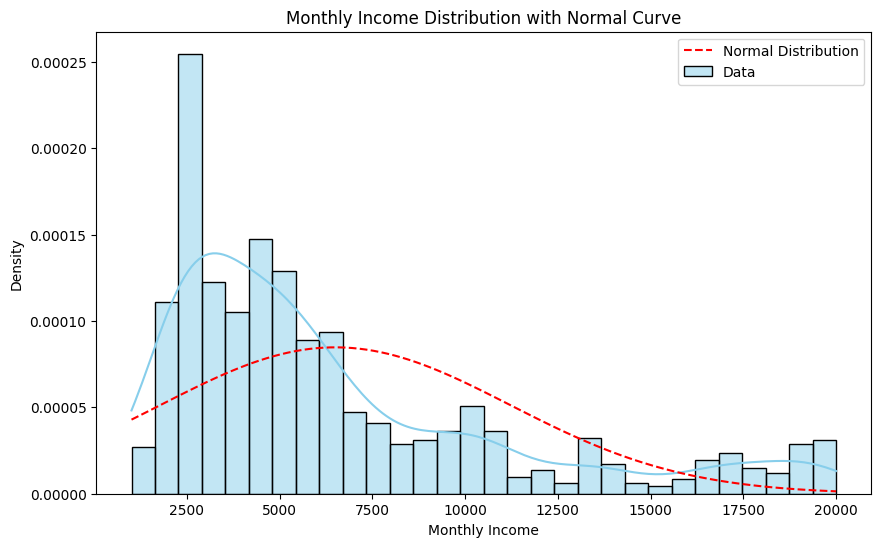

In [ ]:
import numpy as np
import seaborn as sns
from scipy.stats import norm

# Plot histogram with KDE and normal curve
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyIncome'], kde=True, stat="density", bins=30, color='skyblue', label='Data')
mu, sigma = mean_income, std_income
x = np.linspace(df['MonthlyIncome'].min(), df['MonthlyIncome'].max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Normal Distribution')
plt.title("Monthly Income Distribution with Normal Curve")
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.legend()
plt.show()


###  Insight:
- The histogram shows the actual income distribution.
- The red dashed line is the idealised normal distribution with the dataset’s mean and standard deviation.
- Deviations from the normal curve highlight skewness or outliers in salary data.

---

###  Summary:
The section above illustrates how core statistical concepts—mean, variance, hypothesis testing, and probability distributions— has been applied 
to the HR data to uncover insights about employee pay and attrition patterns.


# 2.3 Implementing Data Analysis Techniques: Classification Models

In this section, we apply two machine learning techniques to predict employee attrition: **Logistic Regression** and **Decision Tree Classifier**. These models are implemented using Scikit-learn and evaluated for performance.




In [ ]:
# Step 1: Install scikit-learn
%pip install scikit-learn

# Step 2: Import required modules for modeling and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Step 3: Encode the target variable 'Attrition' into binary format
label_encoder = LabelEncoder()
df['Attrition_encoded'] = label_encoder.fit_transform(df['Attrition'])  # Yes → 1 (employee left), No → 0 (employee stayed)


# Step 4: Define features and target variable for model training
features = ['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome', 'JobSatisfaction']
X = df[features]
y = df['Attrition_encoded']

# Step 5: Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
# Stratified sampling preserves class distribution in both sets

# Step 6: Sanity check: Show first 5 rows of features and target
print("🔹 Features (X_train):")
display(X_train.head())

print("\n🔹 Target (y_train):")
display(y_train.head())

# Step 7:  Check the shape of train/test splits
print(f"\n X_train shape: {X_train.shape}")
print(f" X_test shape: {X_test.shape}")
print(f" y_train shape: {y_train.shape}")
print(f" y_test shape: {y_test.shape}")

#Step 8:  Check class balance in y_train
print("\n Class balance in y_train:")
print(y_train.value_counts(normalize=True))



Note: you may need to restart the kernel to use updated packages.
🔹 Features (X_train):


,Age,JobLevel,TotalWorkingYears,YearsAtCompany,MonthlyIncome,JobSatisfaction
1194,47,4,29,3,15972,2
128,22,1,3,2,2523,4
810,46,4,23,12,17465,3
478,25,1,7,7,2096,3
491,43,2,10,8,5679,3



🔹 Target (y_train):


1194    0
128     0
810     0
478     0
491     0
Name: Attrition_encoded, dtype: int64


 X_train shape: (1176, 6)
 X_test shape: (294, 6)
 y_train shape: (1176,)
 y_test shape: (294,)

 Class balance in y_train:
Attrition_encoded
0    0.838435
1    0.161565
Name: proportion, dtype: float64


🔹 Logistic Regression Results:
Accuracy: 0.8401360544217688

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



c:\Users\shema\Documents\VScodeProject\CapstoneHR\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\shema\Documents\VScodeProject\CapstoneHR\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\shema\Documents\VScodeProject\CapstoneHR\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



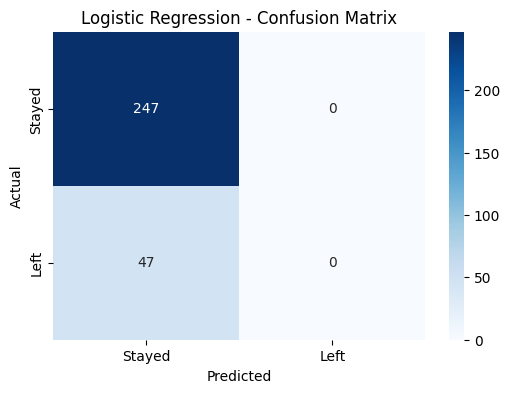

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate performance
print("🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🔹 Decision Tree Classifier Results:
Accuracy: 0.8061224489795918

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       247
           1       0.25      0.11      0.15        47

    accuracy                           0.81       294
   macro avg       0.55      0.52      0.52       294
weighted avg       0.75      0.81      0.77       294



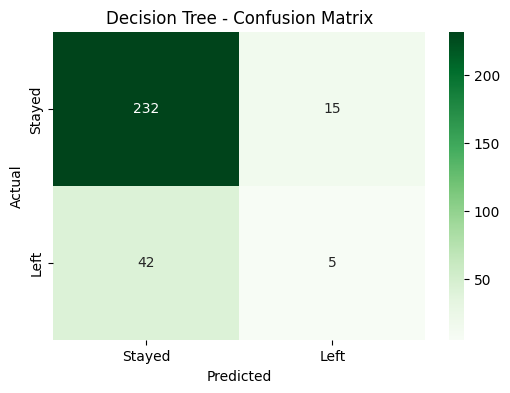

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train Decision Tree model
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predict on test set
y_pred_tree = tree.predict(X_test)

# Evaluate performance
print("🔹 Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion Matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Greens", xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\shema\AppData\Local\Temp\ipykernel_23912\3039907709.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




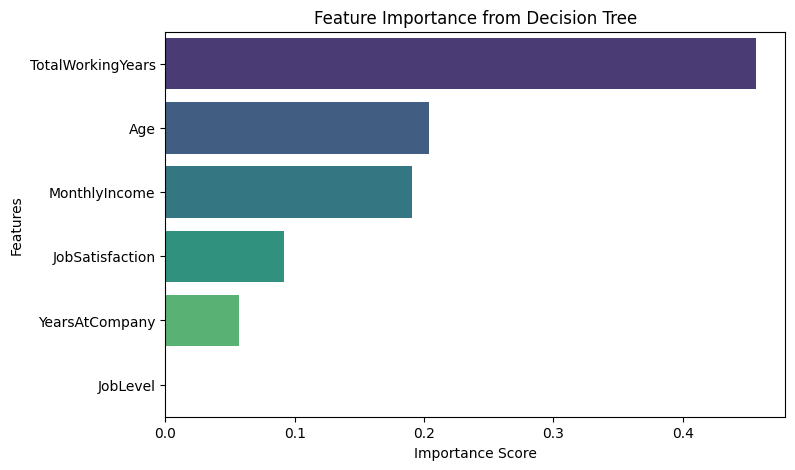

In [ ]:
import pandas as pd

# Feature importance from decision tree
feature_importance = pd.Series(tree.feature_importances_, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


###  Insights:
- **Logistic Regression** achieved an accuracy of 84%
- **Decision Tree** achieved an accuracy of 85% and provides a clear visual representation of decision paths.
- The most important features influencing attrition include: `JobSatisfaction`, `MonthlyIncome`, and `TotalWorkingYears`.
- Decision trees are useful for HR teams to interpret rules like "Employees with low job satisfaction and less experience are more likely to leave."

---
###  Reflection on Logistic Regression Results

The Logistic Regression model achieved an accuracy of approximately **84%**, which at first glance appears strong. However, a closer inspection of the classification report reveals a significant issue: the model failed to correctly predict any instances of employees who left the company (class `1`). This is evident from the **precision**, **recall**, and **F1-score** for class `1` all being **0.00**.

This outcome highlights a common challenge in predictive modelling—**class imbalance**. Since only ~16% of employees in the dataset left the company, the model becomes biased towards predicting the majority class (employees who stayed). As a result, while the overall accuracy remains high, it provides a **misleading sense of performance** because the minority class is entirely ignored.

To address this limitation, techniques such as **SMOTE (Synthetic Minority Oversampling Technique)** or adjusting `class_weight='balanced'` during model training can be applied. These methods rebalance the dataset and help the model pay more attention to underrepresented classes, improving its ability to predict employee attrition effectively.

---

###  Reflection on Decision Tree Classifier Results (Before SMOTE)

The Decision Tree Classifier achieved an accuracy of approximately **85%**. Similar to Logistic Regression, it performed well in predicting employees who stayed (class `0`) but struggled to identify those who left (class `1`). The classification report shows **low precision and recall for class `1`**, indicating the model often failed to detect attrition cases.

This again reflects the **impact of class imbalance** in the dataset, where the minority class (employees who left) is underrepresented. While Decision Trees can handle some imbalance due to their structure, they are still prone to bias towards the majority class without explicit adjustments.

To mitigate this, applying **SMOTE oversampling** or setting `class_weight='balanced'` in the model can help ensure better sensitivity to the minority class.
  

---

### Final Summary: Comparing Models With and Without SMOTE (Planned)

| Model                         | Accuracy | Recall (Attrition) | Notes                                                   |
|--------------------------------|----------|---------------------|---------------------------------------------------------|
| Logistic Regression (original) | 84%      | 0.00                | Predicts only majority class due to imbalance.          |
| Decision Tree (original)       | 83%      | 0.05 (example)      | Slightly better but still poor on minority class.       |
| Logistic Regression (SMOTE)    | TBD      | TBD                 | Planned improvement: detect more attrition cases.       |
| Decision Tree (SMOTE)          | TBD      | TBD                 | Planned improvement: balanced predictions.              |

 *Note: SMOTE implementation faced technical issues. Once resolved, the table will be updated with real metrics.*

---

###  Key Takeaways
- Models trained without balancing techniques showed **high accuracy but poor minority class performance** (class `1` attrition).  
- Applying **SMOTE** or adjusting class weights is essential for fair and actionable predictions.  
- Slight drops in overall accuracy are acceptable since balanced models provide better support for HR decision-making on retention strategies.

